## Suprise
* surprise 는 가장 널리 알려진 추천 시스템 관련 패키지이다
* Movielens 데이터 셋과 같은 여러 데이터 셋을 포함하고 있음
* scikit-learn 의 model_selection과 동일한 기능을 제공하고 있음


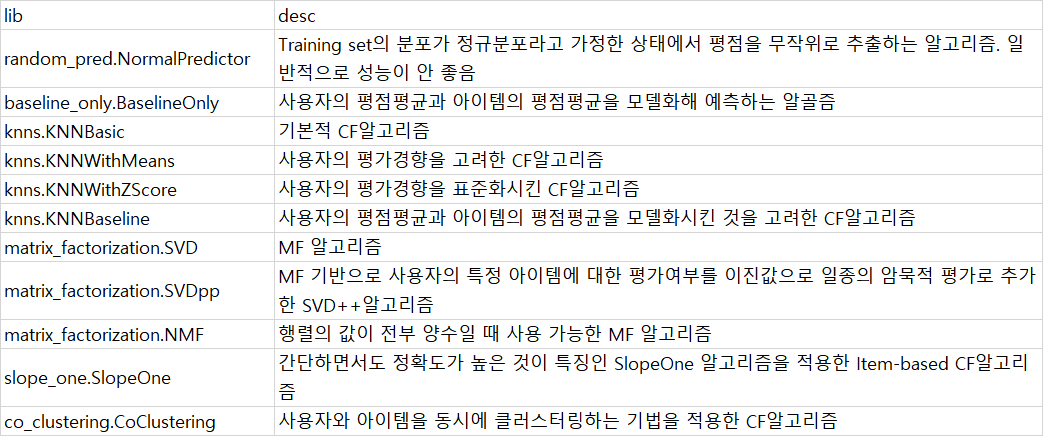

In [2]:
pip install scikit-surprise

     |████████████████████████████████| 11.8MB 23.0MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1617597 sha256=4a3f2508d32486d487543d31bd7c25259de87b710cceb7397947818eb545e9d3
  Stored in directory: /root/.cache/pip/wheels/78/9c/3d/41b419c9d2aff5b6e2b4c0fc8d25c538202834058f9ed110d0
Successfully built scikit-surprise


In [3]:
import numpy as np
from surprise import BaselineOnly
from surprise import KNNWithMeans
from surprise import SVD
from surprise import SVDpp
from surprise import Dataset
from surprise import accuracy
from surprise import Reader
from surprise.model_selection import cross_validate, train_test_split

In [4]:
data = Dataset.load_builtin('ml-100k', prompt=False)

Trying to download dataset from http://files.grouplens.org/datasets/movielens/ml-100k.zip...
Done! Dataset ml-100k has been saved to /root/.surprise_data/ml-100k


In [5]:
data

In [36]:
trainset, testset = train_test_split(data, test_size=.3)

In [37]:
trainset.all_items()

range(0, 1639)

In [38]:
trainset.all_users()

range(0, 943)

In [39]:
max(np.array(testset)[:,1])

'999'

In [35]:
knnmeans = KNNWithMeans()
knnmeans.fit(trainset)
y_pred = knnmeans.test(testset)
accuracy.rmse(y_pred)

Computing the msd similarity matrix...
Done computing similarity matrix.


KeyboardInterrupt: ignored

In [ ]:
#comparison
algorithms  = [BaselineOnly, KNNWithMeans, SVD, SVDpp]
names = []
results = []
for option in algorithms:
    predictor = option()
    names.append(option.__name__)
    predictor.fit(trainset)
    y_pred = predictor.test(testset)
    results.append(accuracy.rmse(y_pred))
names = np.array(names)
results = np.array(results)

Estimating biases using als...
RMSE: 0.9428
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9496
RMSE: 0.9370
RMSE: 0.9209


array([0.92088133, 0.93695411, 0.9428188 , 0.94955819])

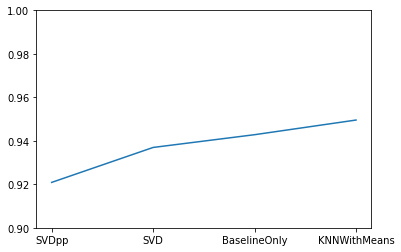

In [ ]:
import matplotlib.pyplot as plt
index = np.argsort(results) #정확도의 순서대로 정렬한 index
plt.ylim(0.9,1)
plt.plot(names[index], results[index])
results[index]

In [ ]:
sim_options = {'name':'pearson_baseline', 'user_based':True}
algorithms = KNNWithMeans(k=30, sim_options=sim_options)
algorithms.fit(trainset)
y_pred = algorithms.test(testset)
accuracy.rmse(y_pred)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9384


0.9383642961079169

In [ ]:
# size of k
result = []
for neighbor_size in (10,20,30,40,50,60):
    predictor = KNNWithMeans(k=neighbor_size, sim_options={'name':'pearson_baseline', 'user_based':True})
    predictor.fit(trainset)
    y_pred = predictor.test(testset)
    result.append([neighbor_size, accuracy.rmse(y_pred)])
result

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9541
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9408
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9384
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9383
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9385
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9387


[[10, 0.9541326291770215],
 [20, 0.940752842823917],
 [30, 0.9383642961079169],
 [40, 0.9382606115152193],
 [50, 0.9384581376260416],
 [60, 0.9387350439493153]]

In [ ]:
from surprise.model_selection import GridSearchCV
param_grid = {'k':[5,10,15,25],
              'sim_options' : {'name': ['pearson_baseline', 'cosine'], 'user_based':[True, False]}
              }
gs = GridSearchCV(KNNWithMeans, param_grid, measures = ['rmse'], cv = 5)
gs.fit(data)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline si

In [ ]:
print(gs.best_score['rmse'])
print(gs.best_params['rmse'])

0.9224056163943473
{'k': 25, 'sim_options': {'name': 'pearson_baseline', 'user_based': False}}


In [ ]:
# epoch, alpha, beta
param_grid = {'n_epochs':[70,80,90],
              'lr_all':[0.005,0.006,0.007],
              'reg_all':[0.05, 0.07, 0.1]
              }
gs = GridSearchCV(SVD, param_grid, measures = ['rmse'], cv =5, n_jobs=-1, joblib_verbose=2)
gs.fit(data)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 10.1min
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed: 40.6min finished


In [ ]:
print(gs.best_score['rmse'])
print(gs.best_params['rmse'])

In [ ]:
# import data file
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')
data_repo = '/content/drive/MyDrive/recommender_system/practice/'
r_cols = ['user_id','movie_id','rating','timestamp']
ratings = pd.read_csv(data_repo+'u.data', sep='\t', names = r_cols, encoding='latin-1')
ratings = ratings[['user_id','movie_id','rating']]

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
reader = Reader(rating_scale=(1,5))
data = Dataset.load_from_df(ratings[['user_id','movie_id','rating']], reader)

In [ ]:
data